<a href="https://colab.research.google.com/github/kumarashutosh22/UCI_Datasets/blob/master/Online_Shoppers_Purchasing_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Info

**Source:**

1. $C.$ $Okan$ $Sakar$<Br>
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences,<Br>
Bahcesehir University,
34349 Besiktas, Istanbul, Turkey

2. $Yomi$ $Kastro$<Br>
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey<Br><Br><Br>

**Data Set Information:**

- The dataset consists of feature vectors belonging to $12,330$ sessions.

- The dataset was formed so that each session
would belong to a different user in a $1$-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.<Br><Br><Br>

**Attribute Information:**

- The dataset consists of $10$ $numerical$ and $8$ $categorical$ attributes.

- The $"Revenue"$ attribute can be used as the class label.

- $"Administrative"$, $"Administrative$ $Duration"$, $"Informational"$, $"Informational$ $Duration"$, $"Product$ $Related"$ and $"Product$ $Related$ $Duration"$ represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

- The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

- The $"Bounce$ $Rate"$, $"Exit$ $Rate"$ and $"Page$ $Value"$ features represent the metrics measured by $"Google Analytics"$ for each page in the e-commerce site.

- The value of "Bounce$ $Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave $("bounce")$ without triggering any other requests to the analytics server during that session.

- The value of $"Exit$ $Rate"$ feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- The $"Page$ $Value"$ feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

- The $"Special$ $Day"$ feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.<Br><Br><Br>

**Relevant Papers:**

[Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).](https://doi.org/10.1007/s00521-018-3523-0)

# Libraries

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.svm import SVC

%matplotlib inline





# Dataset

In [40]:
ospi = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')
ospi.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# EDA

In [41]:
# checking the shape of the dataset
ospi.shape
# rows : 12330
# cols : 18

(12330, 18)

In [42]:
# checking the column names
ospi.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [43]:
ospi.info()

# no null values
# most columns are numerical
# 2 categorical columns : 'Month', 'VisitorType'
# 2 boolean columns     : 'Weekend', 'Revenue'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [44]:
for col in ospi.columns:
  if len(ospi[col].unique())<17:
    print(col,'\n{}'.format(ospi[col].unique()),'\nNo. of Categories : {}'.format(len(ospi[col].unique())),end='\n\n')

# 10 unique in Months
# 3 unique in VisitorType
# OperatingSystems column has 8 categories
# Browser column has 13 categories
# Region has 9 categories
# SpecialDay column has 6 categories

SpecialDay 
[0.  0.4 0.8 1.  0.2 0.6] 
No. of Categories : 6

Month 
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'] 
No. of Categories : 10

OperatingSystems 
[1 2 4 3 7 6 8 5] 
No. of Categories : 8

Browser 
[ 1  2  3  4  5  6  7 10  8  9 12 13 11] 
No. of Categories : 13

Region 
[1 9 2 3 4 5 6 7 8] 
No. of Categories : 9

VisitorType 
['Returning_Visitor' 'New_Visitor' 'Other'] 
No. of Categories : 3

Weekend 
[False  True] 
No. of Categories : 2

Revenue 
[False  True] 
No. of Categories : 2



## Graphical

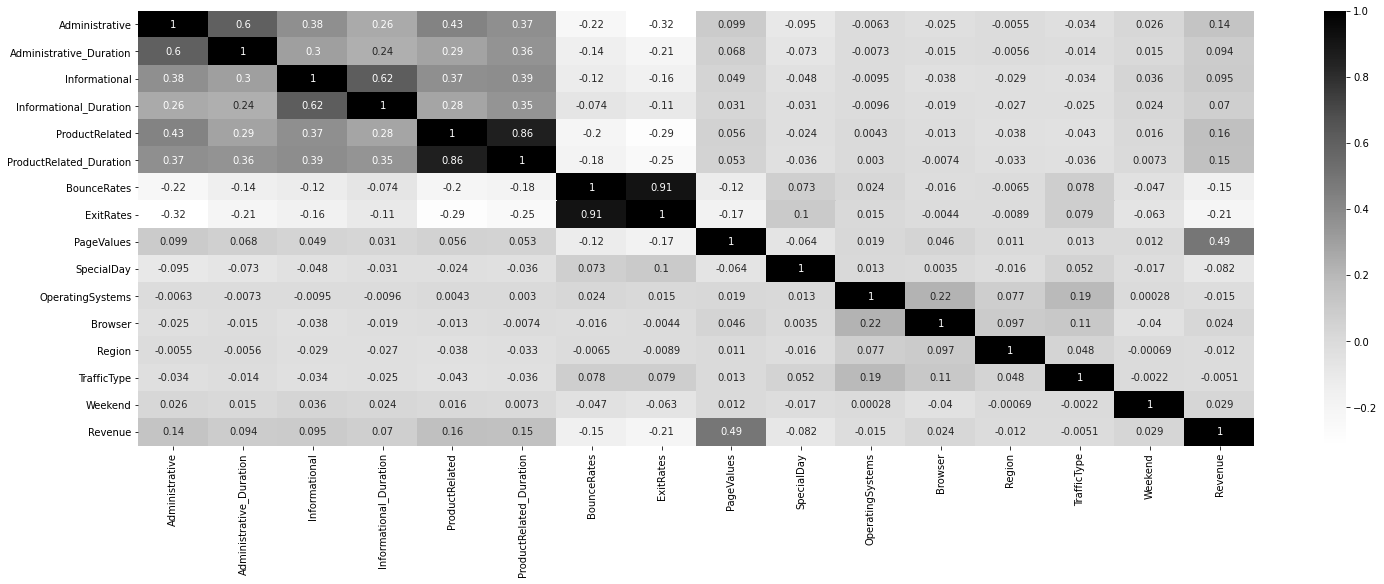

In [45]:
# checking correlation
plt.figure(figsize=(25,8))
sns.heatmap(ospi.corr(),annot=True,cmap='Greys')
plt.show()

In [46]:
# creating columns to provide time spent (in seconds) per page
ospi['ADPP'] = ospi['Administrative_Duration']/ospi['Administrative']
ospi['ADPP'].fillna(0,inplace=True)

ospi['IDPP'] = ospi['Informational_Duration']/ospi['Informational']
ospi['IDPP'].fillna(0,inplace=True)

ospi['PRDPP'] = ospi['ProductRelated_Duration']/ospi['ProductRelated']
ospi['PRDPP'].fillna(0,inplace=True)

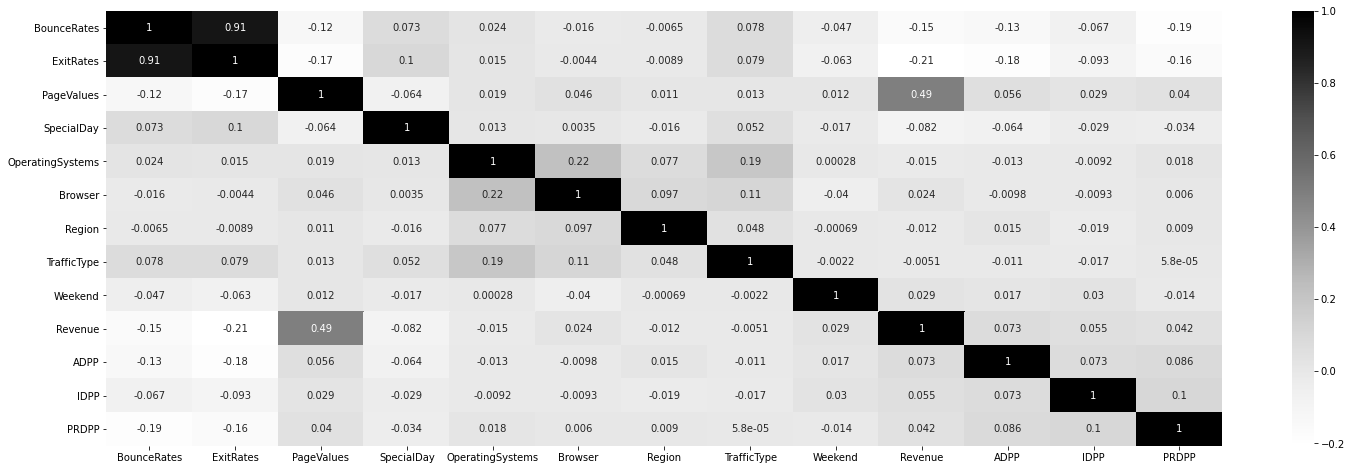

In [47]:
plt.figure(
    figsize=(25,8)
    )
sns.heatmap(
    ospi.drop(['Administrative', 'Administrative_Duration', 'Informational',
               'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'
            ],1
        ).corr(),
    annot=True,
    cmap='Greys'
    )
plt.show()

## Dealing with Categorical Data

In [48]:
ospi['Month'] = ospi['Month'].map({'Jan':1,'Feb':2,'Mar':3,'Apr':4,
                                   'May':5,'June':6,'Jul':7,'Aug':8,
                                   'Sep':9,'Oct':10,'Nov':11,'Dec':12
                                }
                            )

In [49]:
ospi['VisitorType'] = ospi['VisitorType'].map({'Returning_Visitor':0, 
                                               'New_Visitor':1, 
                                               'Other':2
                                               }
                                              )

In [50]:
ospi['Weekend'] = ospi['Weekend'].map({True:1,False:0})

In [51]:
ospi['Revenue'] = ospi['Revenue'].map({True:1,False:0})

In [52]:
ospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Supervised Learning : Classification

## Splitting the data

In [82]:
X = ospi.drop(['Administrative', 'Administrative_Duration', 
               'Informational', 'Informational_Duration', 
               'ProductRelated', 'ProductRelated_Duration','Revenue'],1)
y = ospi['Revenue']

In [83]:
# splitting the dataset
Xtr,Xts,ytr,yts = train_test_split(X,y,test_size=0.3,random_state=0)

## Scaling the Data

In [69]:

Xsc = pd.concat([X.drop(['PageValues','ADPP','IDPP','PRDPP'],1), 
           pd.DataFrame(StandardScaler().fit_transform(
               X[['PageValues','ADPP','IDPP','PRDPP']]),
               columns=['PageValues','ADPP','IDPP','PRDPP'])
           ],1)

In [70]:
Xstr,Xsts,ystr,ysts = train_test_split(Xsc,y,test_size=0.3,random_state=0)

## KNN

In [84]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [86]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, ytr)
    # predict the response
    ypr = knn.predict(Xts)
    # evaluate accuracy
    scores = accuracy_score(yts, ypr)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
k = optimal_k
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 17


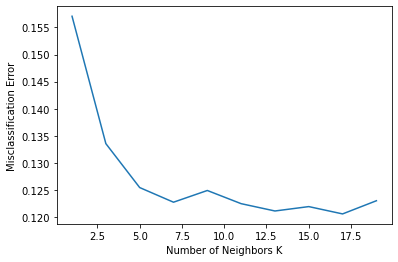

In [87]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [88]:
# instantiate learning model
knn = KNeighborsClassifier(n_neighbors=k)

# fitting the model
knn.fit(Xtr, ytr)

# predict the response
ypr = knn.predict(Xts)

# evaluate accuracy
print(accuracy_score(yts, ypr))

0.8794268721276021


## Naive Bayes

In [90]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(Xtr,ytr)

ypr = naiveClassifier.predict(Xts)

#Keeping the actual and predicted value side by side
y_compare = np.vstack((yts,ypr)).T
#Actual->LEFT
#predicted->RIGHT
#Number of values to be print
y_compare[:20,:]

array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [92]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2976  101]
 [ 345  277]]


In [93]:
#finding accuracy from the confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  3253
False predictions 446


Accuracy of the Naive Bayes Clasification is:  0.8794268721276021


In [95]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3321
           1       0.45      0.73      0.55       378

    accuracy                           0.88      3699
   macro avg       0.71      0.81      0.74      3699
weighted avg       0.91      0.88      0.89      3699



## Support Vector Machine

In [101]:
svc = SVC()
svc.fit(Xtr, ytr)

print("Accuracy on training set: {:.2f}".format(svc.score(Xtr, ytr)))
print("Accuracy on test set: {:.2f}".format(svc.score(Xts, yts)))

Accuracy on training set: 0.89
Accuracy on test set: 0.88
